<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/puertas_logicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recreación de las puertas lógicas del paper:

[_Nonlinear delay differential equations and their application to modeling biological network motifs_](https://www.nature.com/articles/s41467-021-21700-8#Fig5)

In [414]:
import matplotlib.pyplot as plt
import numpy as np
import random 

In [415]:
def supr(e, n, s):
    return e/(1 + s**n)

In [416]:
def RK_solver(S0, evol, t):
    dims = len(S0)
    K = np.empty([4, dims])
    S = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        S[0, d] = S0[d]

    dt = t[1] - t[0]; 
    for i in range(len(t)):
        K[0] = dt * evol(S[i]         , i) 
        K[1] = dt * evol(S[i] + K[0]/2, i)
        K[2] = dt * evol(S[i] + K[1]/2, i)
        K[3] = dt * evol(S[i] + K[2]  , i)
        for d in range(dims):
            S[i+1, d] = S[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    S = S[0:-1,:]
    return S

In [417]:
start=0; step=0.1; num=2**5*200
t = np.arange(0,num)*step+start

S0 = np.array([0.1, 0.1])   

In [418]:
X1 = np.concatenate([np.zeros(num//2), np.ones(num//2)]) 
X2 = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)]) 
X3 = np.concatenate([np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8), 
                     np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8)]) 
X4 = np.concatenate([np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16), 
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16),
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16), 
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16)]) 
X5 = np.concatenate([np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32), 
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32), 
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32), 
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32), 
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32)]) 

# Puerta lógica $(Y_1)$: $(\ X_1\ |\ Y_1\ |\ Y_3\ |\ Y_4\ |\ S_3\ )$

In [419]:
def dS_y1(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(1, n, X3[i]) + supr(1, n, X4[i]) + supr(1, n, X5[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


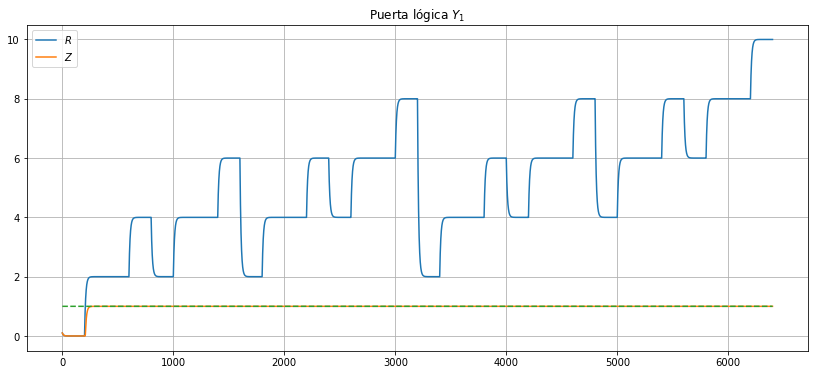

In [420]:
n, e = -2, 1/0.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y1, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_1$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_2)$: $\ Y_1\ \&\ (-Y_2)\ \&\ (-Y_3)$

In [421]:
def dS_y2(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, -n, X2[i]) + supr(1, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


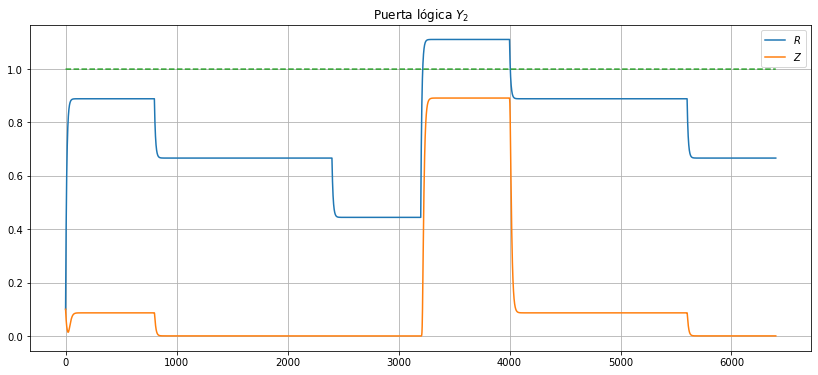

In [422]:
n, e = -2, 1/2.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y2, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
# plt.plot(X1, "--", label="$X_1$"); plt.plot(X2, "--", label="$X_2$")
plt.title("Puerta lógica $Y_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_3)$: $(\ X_2\ |\ Y_1\ )\ \&\ (-Y_2)$

In [452]:
def dS_y3(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(2, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


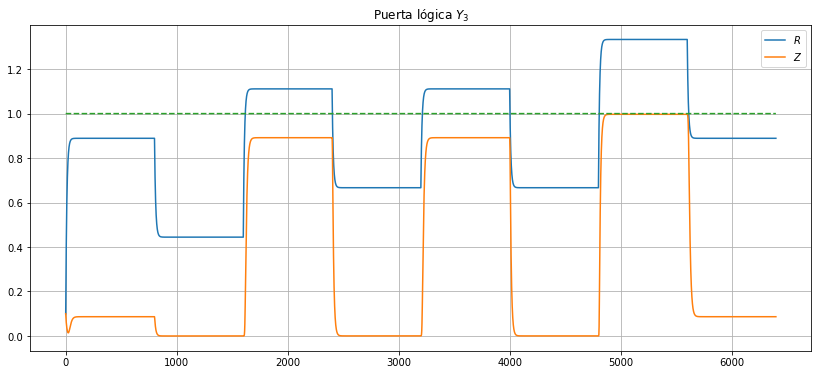

In [453]:
n, e = -2, 1/2.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y3, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_4)$: $(\ X_2\ |\ Y_1\ )$

In [425]:
def dS_y4(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)
<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: overflow encountered in double_scalars
  return e/(1 + s**n)


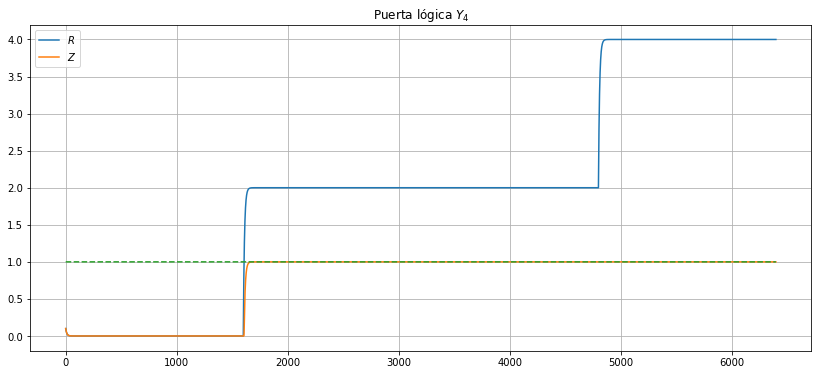

In [426]:
n, e = -2, 1/0.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y4, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_4$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_2)$: $(-Y_2)\ \&\ Y_4$

In [427]:
def dS_z2(S, i):
    R, Z = S
    dR = e*(supr(1, -n, X1[i]) + supr(1, n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


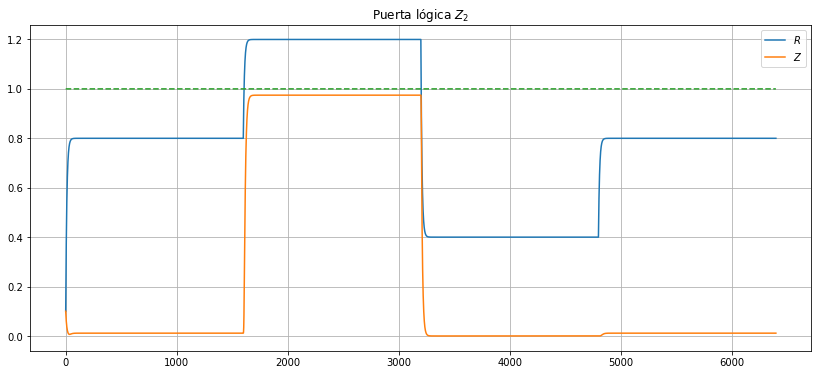

In [428]:
n, e = -2, 1/1.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z2, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Z_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_2)$: $-((\ S_2 |\ S_3)\ \&\ (-S_3|\ S_5))$

In [429]:
def dS_s2(S, i):
    R, Z = S
    dR = e*(supr(2, -n, X1[i]) + supr(2, -n, X2[i]) + supr(1, n, X3[i]) + supr(1, -n, X4[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


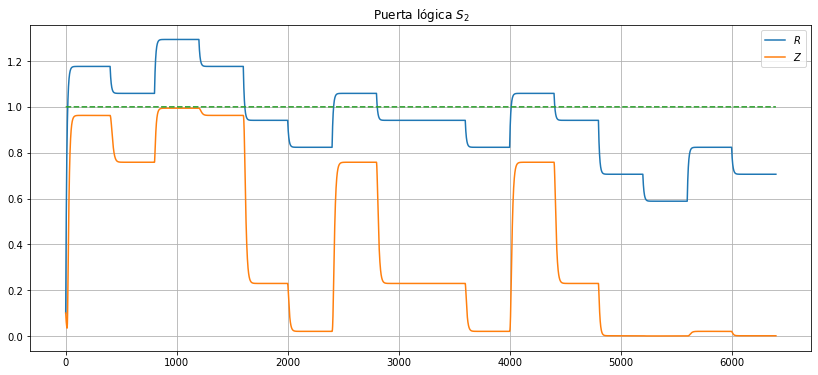

In [430]:
n, e = -2, 1/4.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s2, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_3)$: $\ Y_1\ \&\ (-S_2)$

In [431]:
def dS_s3(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, -n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


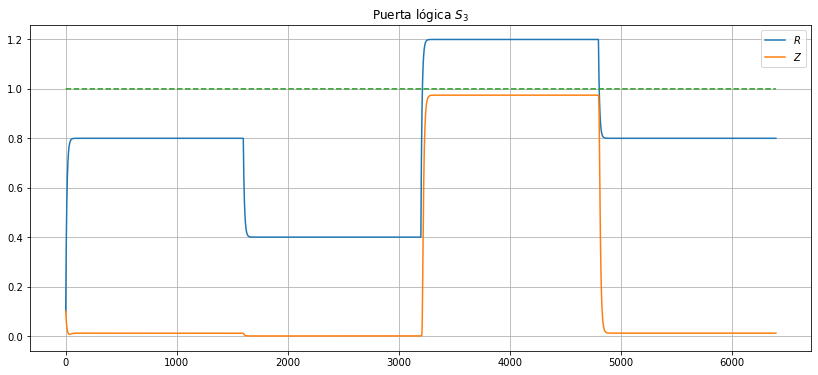

In [432]:
n, e = -2, 1/1.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s3, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_4)$: $(\ Y_1 |\ S_3)\ \&\ (-S_2)$

In [433]:
def dS_s4(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(2, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


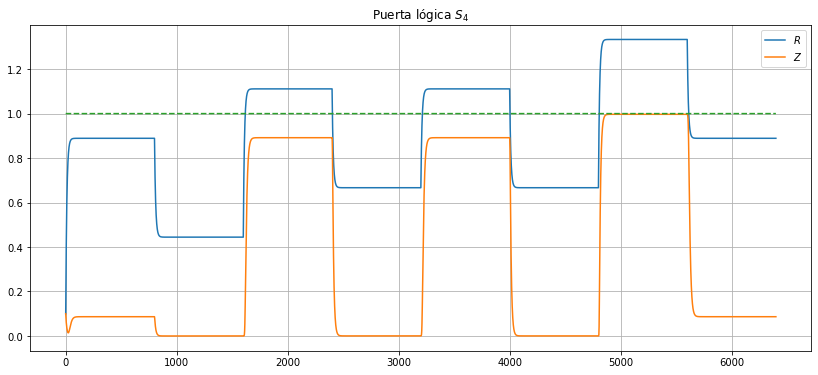

In [434]:
n, e = -2, 1/2.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s4, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_4$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_5)$: $(\ X_2 |\ S_2)$

In [435]:
def dS_s5(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)
<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: overflow encountered in double_scalars
  return e/(1 + s**n)


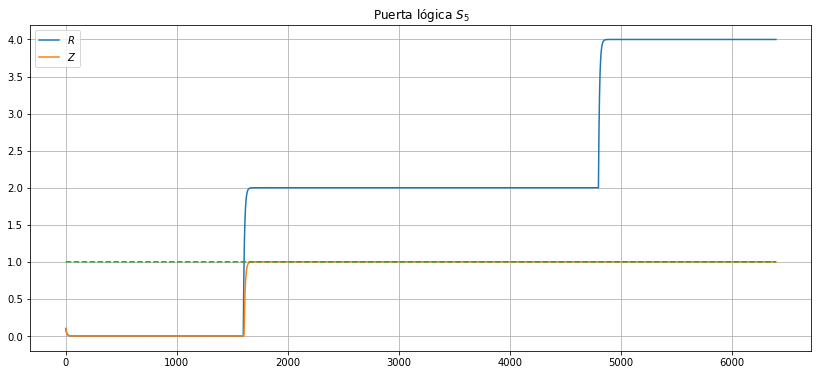

In [436]:
n, e = -2, 1/0.25
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s5, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_5$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_3)$: $(-S_3\ )\ \&\ (\ S_2\ |-S_4\ )$

In [437]:
def dS_z3(S, i):
    R, Z = S
    dR = e*(supr(2, -n, X1[i]) + supr(1, n, X2[i]) + supr(1, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


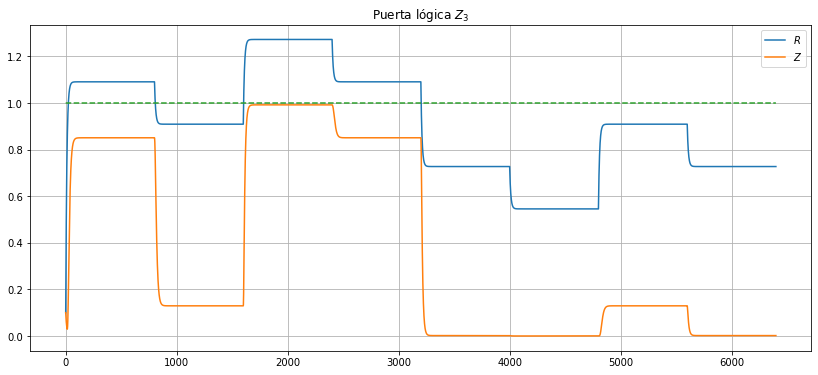

In [438]:
n, e = -2, 1/2.75
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z3, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $Z_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_4)$: $\ Y_1\ \&\ S_3\ \&\ (-S_5)$

In [439]:
def dS_z4(S, i):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(1, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

<ipython-input-415-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


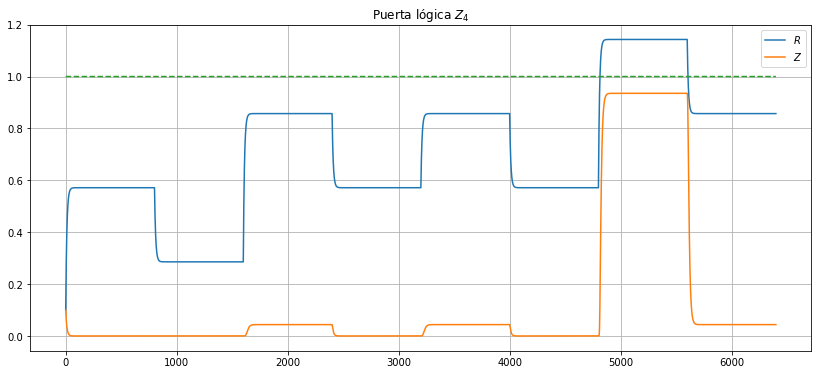

In [440]:
n, e = -2, 1/1.75
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z4, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $Z_4$"); plt.legend(); plt.grid(); plt.show()